In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [93]:
df = pd.read_csv('./datasets/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [94]:
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

In [95]:
df['sms_text'] = df['text'].apply(lambda text: text[8:])

In [96]:
df['sms_text']

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
5723     re : research and development charges to gpg ...
5724     re : receipts from visit  jim ,  thanks again...
5725     re : enron case study update  wow ! all on th...
5726     re : interest  david ,  please , call shirley...
5727     news : aurora 5 . 2 update  aurora version 5 ...
Name: sms_text, Length: 5728, dtype: object

In [97]:
df

,text,spam,sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her..."
...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again..."
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley..."


In [98]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
import string
def remove_punctuations(text):
    translation_table = str.maketrans('', '', string.punctuation)
    return text.translate(translation_table)

In [99]:
df['cleaned_sms_text'] = df['sms_text'].apply(remove_punctuations)

In [100]:
df['sms_text']

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
5723     re : research and development charges to gpg ...
5724     re : receipts from visit  jim ,  thanks again...
5725     re : enron case study update  wow ! all on th...
5726     re : interest  david ,  please , call shirley...
5727     news : aurora 5 . 2 update  aurora version 5 ...
Name: sms_text, Length: 5728, dtype: object

In [101]:
print(remove_punctuations('receipts from visit  jim ,  thanks again'))

receipts from visit  jim   thanks again


In [102]:
df

,text,spam,sms_text,cleaned_sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,naturally irresistible your corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merril...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting ...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,4 color printing special request additional ...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",do not have money get software cds from here...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...,re research and development charges to gpg ...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again...",re receipts from visit jim thanks again f...
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...,re enron case study update wow all on the ...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley...",re interest david please call shirley cr...


In [103]:
import re

def remove_extra_whitespace(text):
    # Replace multiple spaces with a single space
    return re.sub(r'\s+', ' ', text).strip()

In [104]:
def remove_numericals(text):
    for alpha in text:
        if alpha.isdigit():
            text = text.replace(alpha, " ")
#             text.rstrip()
    text = remove_extra_whitespace(text)
    return text

In [105]:
print(remove_numericals('tanbir 34 laskar'))

tanbir laskar


In [106]:
df['nn_sms_text'] = df['cleaned_sms_text'].apply(remove_numericals)

In [107]:
df

,text,spam,sms_text,cleaned_sms_text,nn_sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,naturally irresistible your corporate identit...,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merrill ...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting to...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,4 color printing special request additional ...,color printing special request additional info...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",do not have money get software cds from here...,do not have money get software cds from here s...
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...,re research and development charges to gpg ...,re research and development charges to gpg her...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again...",re receipts from visit jim thanks again f...,re receipts from visit jim thanks again for th...
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...,re enron case study update wow all on the ...,re enron case study update wow all on the same...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley...",re interest david please call shirley cr...,re interest david please call shirley crenshaw...


In [108]:
df['ll_sms_text'] = df['nn_sms_text'].apply(lambda text: text.lower())

In [109]:
df

,text,spam,sms_text,cleaned_sms_text,nn_sms_text,ll_sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,naturally irresistible your corporate identit...,naturally irresistible your corporate identity...,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merrill ...,the stock trading gunslinger fanny is merrill ...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting to...,unbelievable new homes made easy im wanting to...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,4 color printing special request additional ...,color printing special request additional info...,color printing special request additional info...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",do not have money get software cds from here...,do not have money get software cds from here s...,do not have money get software cds from here s...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...,re research and development charges to gpg ...,re research and development charges to gpg her...,re research and development charges to gpg her...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again...",re receipts from visit jim thanks again f...,re receipts from visit jim thanks again for th...,re receipts from visit jim thanks again for th...
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...,re enron case study update wow all on the ...,re enron case study update wow all on the same...,re enron case study update wow all on the same...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley...",re interest david please call shirley cr...,re interest david please call shirley crenshaw...,re interest david please call shirley crenshaw...


In [110]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce

ps = PorterStemmer()

def stemmer(sentence):
    sentence_tokenized = word_tokenize(sentence)
    for word in sentence_tokenized:
        sentence = sentence.replace(word, ps.stem(word))
    return sentence

In [111]:
df['stemmed_sms_text'] = df['ll_sms_text'].apply(stemmer)

In [112]:
print(stemmer('Programmers program with programming languages'))

programm program with program languag


In [113]:
df

,text,spam,sms_text,cleaned_sms_text,nn_sms_text,ll_sms_text,stemmed_sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,naturally irresistible your corporate identit...,naturally irresistible your corporate identity...,naturally irresistible your corporate identity...,natur irresist your corpor ident lt is realli ...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merrill ...,the stock trading gunslinger fanny is merrill ...,the stock trade gunsling fanni is merril but m...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting to...,unbelievable new homes made easy im wanting to...,unbeliev new home made easi im want to show yo...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,4 color printing special request additional ...,color printing special request additional info...,color printing special request additional info...,color print special request addit inform now c...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",do not have money get software cds from here...,do not have money get software cds from here s...,do not have money get software cds from here s...,do not have money get softwar cd from here sof...
...,...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...,re research and development charges to gpg ...,re research and development charges to gpg her...,re research and development charges to gpg her...,re research and develop charg to gpg here it i...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again...",re receipts from visit jim thanks again f...,re receipts from visit jim thanks again for th...,re receipts from visit jim thanks again for th...,re receipt from visit jim thank again for the ...
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...,re enron case study update wow all on the ...,re enron case study update wow all on the same...,re enron case study update wow all on the same...,re enron case studi updat wow all on the same ...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley...",re interest david please call shirley cr...,re interest david please call shirley crenshaw...,re interest david please call shirley crenshaw...,re interest david pleas call shirley crenshaw ...


In [114]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_words = [word for word in word_tokens if word not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    
    return filtered_sentence

In [115]:
print(remove_stop_words('tanbir is a good boy'))

tanbir good boy


In [116]:
df['rem-stop-words_sms_text'] = df['stemmed_sms_text'].apply(remove_stop_words)

In [117]:
df

,text,spam,sms_text,cleaned_sms_text,nn_sms_text,ll_sms_text,stemmed_sms_text,rem-stop-words_sms_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,naturally irresistible your corporate identit...,naturally irresistible your corporate identity...,naturally irresistible your corporate identity...,natur irresist your corpor ident lt is realli ...,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merril...,the stock trading gunslinger fanny is merrill ...,the stock trading gunslinger fanny is merrill ...,the stock trade gunsling fanni is merril but m...,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting ...,unbelievable new homes made easy im wanting to...,unbelievable new homes made easy im wanting to...,unbeliev new home made easi im want to show yo...,unbeliev new home made easi im want show thi h...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,4 color printing special request additional ...,color printing special request additional info...,color printing special request additional info...,color print special request addit inform now c...,color print special request addit inform click...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",do not have money get software cds from here...,do not have money get software cds from here s...,do not have money get software cds from here s...,do not have money get softwar cd from here sof...,money get softwar cd softwar compat great grow...
...,...,...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...,re research and development charges to gpg ...,re research and development charges to gpg her...,re research and development charges to gpg her...,re research and develop charg to gpg here it i...,research develop charg gpg forward shirley cre...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again...",re receipts from visit jim thanks again f...,re receipts from visit jim thanks again for th...,re receipts from visit jim thanks again for th...,re receipt from visit jim thank again for the ...,receipt visit jim thank invit visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...,re enron case study update wow all on the ...,re enron case study update wow all on the same...,re enron case study update wow all on the same...,re enron case studi updat wow all on the same ...,enron case studi updat wow day super thank ver...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley...",re interest david please call shirley cr...,re interest david please call shirley crenshaw...,re interest david please call shirley crenshaw...,re interest david pleas call shirley crenshaw ...,interest david pleas call shirley crenshaw ass...


In [118]:
X = df['rem-stop-words_sms_text']

In [119]:
X

0       natur irresist corpor ident lt realli hard rec...
1       stock trade gunsling fanni merril muzo colza a...
2       unbeliev new home made easi im want show thi h...
3       color print special request addit inform click...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    research develop charg gpg forward shirley cre...
5724    receipt visit jim thank invit visit lsu shirle...
5725    enron case studi updat wow day super thank ver...
5726    interest david pleas call shirley crenshaw ass...
5727    news aurora updat aurora version fastest model...
Name: rem-stop-words_sms_text, Length: 5728, dtype: object

In [120]:
y = df['spam']

In [121]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

(array([4360.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1368.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

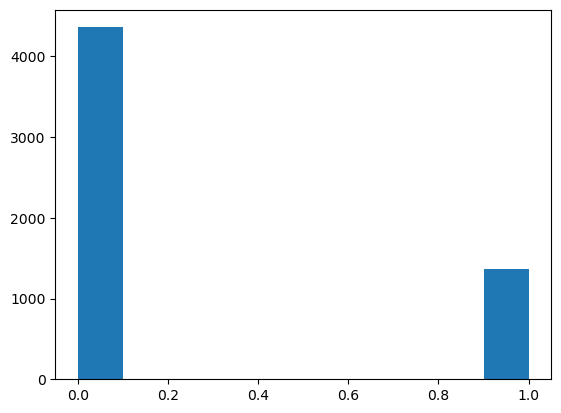

In [122]:
plt.hist(y)